# SNP Manhattan plot

In [8]:
import sys; sys.path.insert(0, "../../../")
import coolbox
from coolbox.api import *
import numpy as np

In [9]:
coolbox.__version__

'0.3.0'

In [10]:
data_dir = "../../../tests/test_data"
snp_file = f"{data_dir}/snp_chr9_4000000_6000000.snp"
test_region = "chr9:4000000-6000000"

SNP file:

In [11]:
!head -n 5 ../../../tests/test_data/snp_chr9_4000000_6000000.snp

9	rs189401472	4000487	C	T	261481	0.00113584	-0.00280829	0.00319297	0.379119
9	rs141556758	4000942	T	G	262192	0.00131392	0.00119277	0.00296521	0.687497
9	rs117844905	4001207	A	G	262342	0.0301343	-0.000341362	0.000628006	0.586741
9	rs142341062	4002372	A	T	261738	0.00123979	6.13843e-05	0.003055	0.983969
9	rs500044	4002823	G	A	262342	0.131891	0.000325518	0.000317269	0.304892


Specify the column index of chromosome, position and pvalue of the input file:

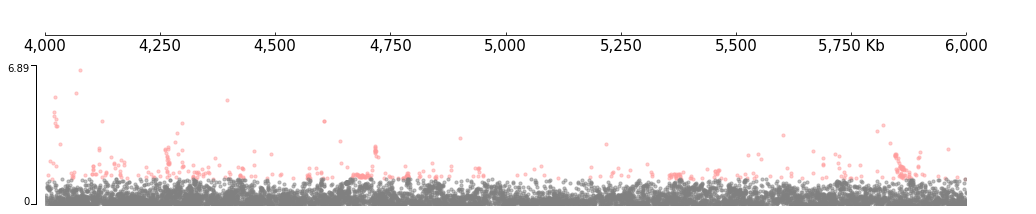

In [12]:
frame = XAxis() + SNP(snp_file, col_chrom=0, col_pos=2, col_pval=9)
frame.plot(test_region)

Plot with genes:

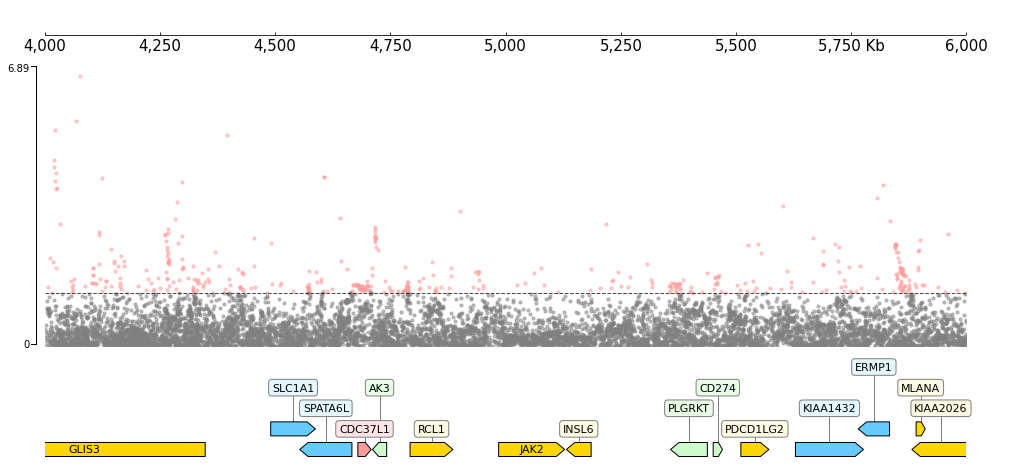

In [13]:
gtf_file = f"{data_dir}/gtf_chr9_4000000_6000000.gtf"

frame = XAxis() + \
    SNP(snp_file, col_chrom=0, col_pos=2, col_pval=9) + TrackHeight(10) + HLines(-np.log10(0.05)) + \
    GTF(gtf_file)

frame.plot(test_region)

### CLI code

In [14]:
%%bash

snp_file="../../../tests/test_data/snp_chr9_4000000_6000000.snp"
gtf_file="../../../tests/test_data/gtf_chr9_4000000_6000000.gtf"

coolbox add XAxis - \
add SNP $snp_file --col_chrom 0 --col_pos 2 --col_pval 9 - \
add TrackHeight 10 - \
add GTF $gtf_file - \
goto "chr9:4000000-6000000" - \
plot /tmp/test_coolbox.png